In [2]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [3]:
import matplotlib.image as image
file = './img/attack_zone.png'
logo = image.imread(file)

In [5]:
input_file = os.path.join('.\datasets','2018.csv')
df = pd.read_csv(input_file)

In [6]:
df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
0,1,REGULAR,00:29,2018020001,8,Montréal Canadiens,Shot,Artturi Lehkonen,Frederik Andersen,Backhand,78.0,-19.0,NaN,NaN,Toronto Maple Leafs
1,1,REGULAR,00:49,2018020001,10,Toronto Maple Leafs,Shot,Morgan Rielly,Carey Price,Snap Shot,-37.0,-10.0,NaN,NaN,Toronto Maple Leafs
2,1,REGULAR,01:00,2018020001,8,Montréal Canadiens,Shot,Brendan Gallagher,Frederik Andersen,Wrist Shot,47.0,-23.0,NaN,NaN,Toronto Maple Leafs
3,1,REGULAR,03:54,2018020001,8,Montréal Canadiens,Shot,Brendan Gallagher,Frederik Andersen,Snap Shot,53.0,14.0,NaN,NaN,Toronto Maple Leafs
4,1,REGULAR,04:06,2018020001,8,Montréal Canadiens,Shot,Mike Reilly,Frederik Andersen,Snap Shot,77.0,-2.0,NaN,NaN,Toronto Maple Leafs


## Preparing Data

In [7]:
attack_df = df.copy()
# Coordinate adjustments:
attack_df.loc[df['x_coordinate'] < 0, 'x_coordinate'] = -attack_df['x_coordinate']
attack_df.loc[df['x_coordinate'] < 0, 'y_coordinate'] = -attack_df['y_coordinate']
attack_df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
0,1,REGULAR,00:29,2018020001,8,Montréal Canadiens,Shot,Artturi Lehkonen,Frederik Andersen,Backhand,78.0,-19.0,NaN,NaN,Toronto Maple Leafs
1,1,REGULAR,00:49,2018020001,10,Toronto Maple Leafs,Shot,Morgan Rielly,Carey Price,Snap Shot,37.0,10.0,NaN,NaN,Toronto Maple Leafs
2,1,REGULAR,01:00,2018020001,8,Montréal Canadiens,Shot,Brendan Gallagher,Frederik Andersen,Wrist Shot,47.0,-23.0,NaN,NaN,Toronto Maple Leafs
3,1,REGULAR,03:54,2018020001,8,Montréal Canadiens,Shot,Brendan Gallagher,Frederik Andersen,Snap Shot,53.0,14.0,NaN,NaN,Toronto Maple Leafs
4,1,REGULAR,04:06,2018020001,8,Montréal Canadiens,Shot,Mike Reilly,Frederik Andersen,Snap Shot,77.0,-2.0,NaN,NaN,Toronto Maple Leafs


In [8]:
# Binning
bin_size = 5

In [9]:
attack_df['x_bin'] = pd.cut(attack_df['x_coordinate'], bins=range(0, 100+bin_size, bin_size))
attack_df['y_bin'] = pd.cut(attack_df['y_coordinate'], bins=range(-45, 45+bin_size, bin_size))

In [10]:
attack_df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team,x_bin,y_bin
0,1,REGULAR,00:29,2018020001,8,Montréal Canadiens,Shot,Artturi Lehkonen,Frederik Andersen,Backhand,78.0,-19.0,NaN,NaN,Toronto Maple Leafs,"(75, 80]","(-20, -15]"
1,1,REGULAR,00:49,2018020001,10,Toronto Maple Leafs,Shot,Morgan Rielly,Carey Price,Snap Shot,37.0,10.0,NaN,NaN,Toronto Maple Leafs,"(35, 40]","(5, 10]"
2,1,REGULAR,01:00,2018020001,8,Montréal Canadiens,Shot,Brendan Gallagher,Frederik Andersen,Wrist Shot,47.0,-23.0,NaN,NaN,Toronto Maple Leafs,"(45, 50]","(-25, -20]"
3,1,REGULAR,03:54,2018020001,8,Montréal Canadiens,Shot,Brendan Gallagher,Frederik Andersen,Snap Shot,53.0,14.0,NaN,NaN,Toronto Maple Leafs,"(50, 55]","(10, 15]"
4,1,REGULAR,04:06,2018020001,8,Montréal Canadiens,Shot,Mike Reilly,Frederik Andersen,Snap Shot,77.0,-2.0,NaN,NaN,Toronto Maple Leafs,"(75, 80]","(-5, 0]"


In [11]:
games_per_team = df.groupby('attacking_team_name')['gameID'].nunique()
games_per_team.head()

attacking_team_name
Anaheim Ducks       82
Arizona Coyotes     82
Boston Bruins      106
Buffalo Sabres      82
Calgary Flames      87
Name: gameID, dtype: int64

In [12]:
shot_ratios = attack_df.groupby(['attacking_team_name', 'x_bin', 'y_bin']).size().reset_index(name='shots')

C:\Users\Ulrich TEDONGMO\AppData\Local\Temp\ipykernel_12404\4113095149.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shot_ratios = attack_df.groupby(['attacking_team_name', 'x_bin', 'y_bin']).size().reset_index(name='shots')


In [13]:
shot_ratios['shots_per_hour'] = shot_ratios['shots'] / shot_ratios['attacking_team_name'].map(games_per_team)

In [14]:
shot_ratios.head()

,attacking_team_name,x_bin,y_bin,shots,shots_per_hour
0,Anaheim Ducks,"(0, 5]","(-45, -40]",0,0.000000
1,Anaheim Ducks,"(0, 5]","(-40, -35]",5,0.060976
2,Anaheim Ducks,"(0, 5]","(-35, -30]",1,0.012195
3,Anaheim Ducks,"(0, 5]","(-30, -25]",0,0.000000
4,Anaheim Ducks,"(0, 5]","(-25, -20]",0,0.000000


In [15]:
league_avgs = shot_ratios.groupby(['x_bin', 'y_bin'])['shots_per_hour'].mean().reset_index()
league_avgs.head()

C:\Users\Ulrich TEDONGMO\AppData\Local\Temp\ipykernel_12404\483994127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  league_avgs = shot_ratios.groupby(['x_bin', 'y_bin'])['shots_per_hour'].mean().reset_index()


,x_bin,y_bin,shots_per_hour
0,"(0, 5]","(-45, -40]",0.002550
1,"(0, 5]","(-40, -35]",0.025792
2,"(0, 5]","(-35, -30]",0.015441
3,"(0, 5]","(-30, -25]",0.015653
4,"(0, 5]","(-25, -20]",0.009309


In [613]:
### Check if shot_per_hour sums up to 1

## Visualization

In [16]:
shot_ratios['attacking_team_name'].unique()

array(['Anaheim Ducks', 'Arizona Coyotes', 'Boston Bruins',
       'Buffalo Sabres', 'Calgary Flames', 'Carolina Hurricanes',
       'Chicago Blackhawks', 'Colorado Avalanche',
       'Columbus Blue Jackets', 'Dallas Stars', 'Detroit Red Wings',
       'Edmonton Oilers', 'Florida Panthers', 'Los Angeles Kings',
       'Minnesota Wild', 'Montréal Canadiens', 'Nashville Predators',
       'New Jersey Devils', 'New York Islanders', 'New York Rangers',
       'Ottawa Senators', 'Philadelphia Flyers', 'Pittsburgh Penguins',
       'San Jose Sharks', 'St. Louis Blues', 'Tampa Bay Lightning',
       'Toronto Maple Leafs', 'Vancouver Canucks', 'Vegas Golden Knights',
       'Washington Capitals', 'Winnipeg Jets'], dtype=object)

In [25]:
team = 'Winnipeg Jets'

In [26]:
df_vis = shot_ratios[shot_ratios['attacking_team_name']==team]
df_vis.head()

,attacking_team_name,x_bin,y_bin,shots,shots_per_hour
10800,Winnipeg Jets,"(0, 5]","(-45, -40]",0,0.000000
10801,Winnipeg Jets,"(0, 5]","(-40, -35]",2,0.022727
10802,Winnipeg Jets,"(0, 5]","(-35, -30]",1,0.011364
10803,Winnipeg Jets,"(0, 5]","(-30, -25]",0,0.000000
10804,Winnipeg Jets,"(0, 5]","(-25, -20]",0,0.000000


In [27]:
df_vis['x_center'] = df_vis['x_bin'].apply(lambda x: (x.left + x.right) / 2)
df_vis['y_center'] = df_vis['y_bin'].apply(lambda x: (x.left + x.right) / 2)

C:\Users\Ulrich TEDONGMO\AppData\Local\Temp\ipykernel_12404\2495569533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis['x_center'] = df_vis['x_bin'].apply(lambda x: (x.left + x.right) / 2)
C:\Users\Ulrich TEDONGMO\AppData\Local\Temp\ipykernel_12404\2495569533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis['y_center'] = df_vis['y_bin'].apply(lambda x: (x.left + x.right) / 2)


In [28]:
df_vis.head()

,attacking_team_name,x_bin,y_bin,shots,shots_per_hour,x_center,y_center
10800,Winnipeg Jets,"(0, 5]","(-45, -40]",0,0.000000,2.5,-42.5
10801,Winnipeg Jets,"(0, 5]","(-40, -35]",2,0.022727,2.5,-37.5
10802,Winnipeg Jets,"(0, 5]","(-35, -30]",1,0.011364,2.5,-32.5
10803,Winnipeg Jets,"(0, 5]","(-30, -25]",0,0.000000,2.5,-27.5
10804,Winnipeg Jets,"(0, 5]","(-25, -20]",0,0.000000,2.5,-22.5


In [29]:
df_vis = df_vis.merge(league_avgs, on=['x_bin', 'y_bin'], how='left')
# Create a new column for the difference between the team's shots_per_hour and the league average
df_vis['shot_diff'] = df_vis['shots_per_hour_x'] - df_vis['shots_per_hour_y']
df_vis.head()

,attacking_team_name,x_bin,y_bin,shots,shots_per_hour_x,x_center,y_center,shots_per_hour_y,shot_diff
0,Winnipeg Jets,"(0, 5]","(-45, -40]",0,0.000000,2.5,-42.5,0.002550,-0.002550
1,Winnipeg Jets,"(0, 5]","(-40, -35]",2,0.022727,2.5,-37.5,0.025792,-0.003065
2,Winnipeg Jets,"(0, 5]","(-35, -30]",1,0.011364,2.5,-32.5,0.015441,-0.004077
3,Winnipeg Jets,"(0, 5]","(-30, -25]",0,0.000000,2.5,-27.5,0.015653,-0.015653
4,Winnipeg Jets,"(0, 5]","(-25, -20]",0,0.000000,2.5,-22.5,0.009309,-0.009309


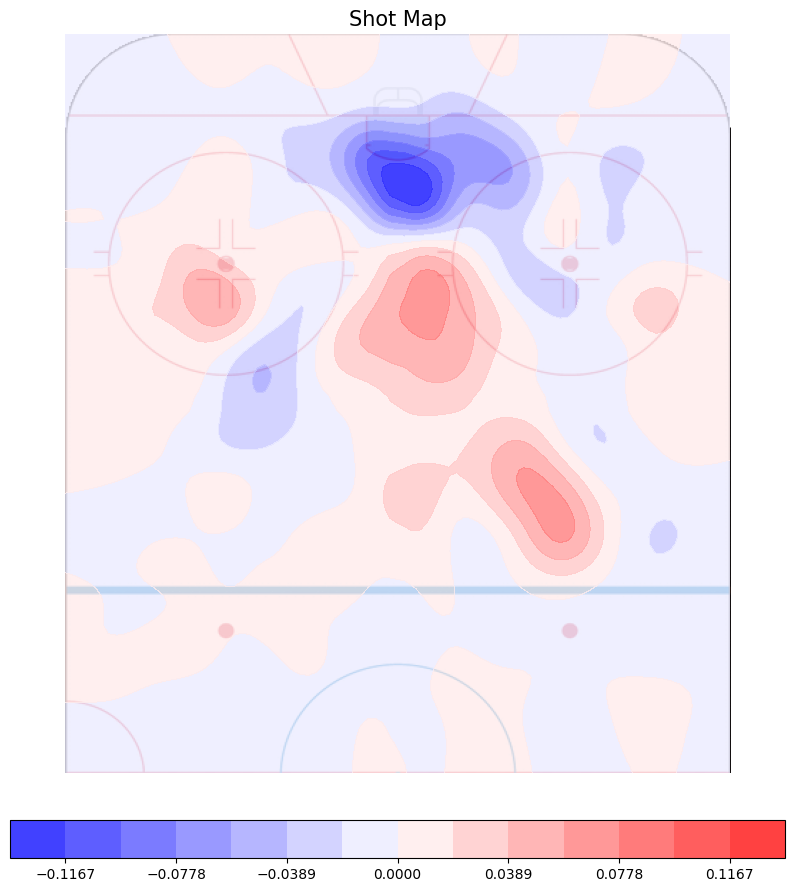

In [30]:
from scipy.ndimage import gaussian_filter
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
# Ref: https://thecommutesports.com/2022/08/06/creating-nhl-shot-maps-with-python/
[x,y] = np.round(np.meshgrid(np.linspace(-45,45,90), np.linspace(0,100,100)))
grid = griddata((df_vis['y_center'][::-1],df_vis['x_center']),df_vis['shot_diff'],(x,y),method='linear',fill_value=0)
smooothed_data = gaussian_filter(grid,sigma = 3)
data_min= smooothed_data.min()
data_max= smooothed_data.max()

if abs(data_min) > data_max:
    data_max = data_min * -1
elif data_max > abs(data_min):
    data_min = data_max * -1

fig, ax = plt.subplots(1,1, figsize=(10,12), facecolor='w', edgecolor='k')
ax.imshow(logo, extent=[x.min(), x.max(), y.min(), y.max()])
ax = ax.contourf(x,y,smooothed_data,alpha = 0.8, cmap='bwr', 
        levels = np.linspace(data_min,data_max,15),
        vmin=data_min,
        vmax=data_max,
            )
plt.axis('off')
plt.title('Shot Map',fontdict={'fontsize': 15})
fig.colorbar(ax, orientation="horizontal",pad = 0.05)
plt.show()